In [7]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv(Path('Air_v_Diabetes_Database.csv'))
df.head()

,Unnamed: 0,ID WHO city,iso3,country,CityName,pm10,Year_x,type_of_stations,pm10_type,pm25,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,0,2605.0,USA,United States of America,Akron,19.207991,2014,-,Converted,10.4,...,12.9,NaN,NaN,6574,"(41.0807560689, -81.4503350072)",HLTHOUT,DIABETES,3901000.0,3.915350e+10,Diabetes
1,1,2605.0,USA,United States of America,Akron,19.207991,2014,-,Converted,10.4,...,25.7,NaN,NaN,2913,"(41.0806403452, -81.5509027089)",HLTHOUT,DIABETES,3901000.0,3.915351e+10,Diabetes
2,2,2605.0,USA,United States of America,Akron,19.207991,2014,-,Converted,10.4,...,18.6,NaN,NaN,1491,"(41.0499564598, -81.5233458795)",HLTHOUT,DIABETES,3901000.0,3.915350e+10,Diabetes
3,3,2605.0,USA,United States of America,Akron,19.207991,2014,-,Converted,10.4,...,15.6,NaN,NaN,5642,"(41.0968405496, -81.4884726996)",HLTHOUT,DIABETES,3901000.0,3.915350e+10,Diabetes
4,4,2605.0,USA,United States of America,Akron,19.207991,2014,-,Converted,10.4,...,11.1,NaN,NaN,2910,"(41.095228314, -81.5489870893)",HLTHOUT,DIABETES,3901000.0,3.915351e+10,Diabetes


In [9]:
#copying necessary rows

Clean_df = df[["Data_Value","pm10", "pm25"]].copy()

In [10]:
#drop null values

df = Clean_df.dropna()

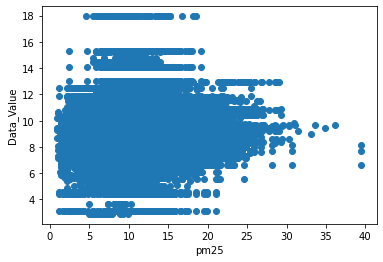

In [11]:
#scatter plot of data
plt.scatter(df.Data_Value, df.pm25)
plt.xlabel('pm25')
plt.ylabel('Data_Value')
plt.show()

In [12]:
# we reshaped the data for linear regression model
X = df.pm25.values.reshape(-1, 1)

In [13]:
X[:5]

array([[10.4],
       [10.4],
       [10.4],
       [10.4],
       [10.4]])

In [14]:
X.shape

(38289, 1)

In [15]:
# Setting y value
y = df.Data_Value

In [16]:
# define the model
model = LinearRegression()

In [17]:
#fit the model 
model.fit(X, y)

LinearRegression()

In [18]:
#Creating the prediction for best fit line
y_pred = model.predict(X)
print(y_pred.shape)

(38289,)


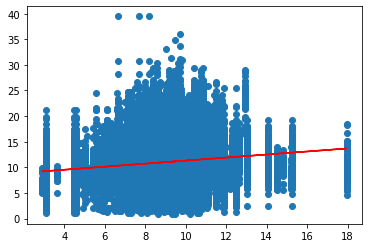

In [19]:
#plot best fit line with data
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [20]:
#coef = slope
#intercept = y intercept
print(model.coef_)
print(model.intercept_)

[0.29670413]
8.345363710098363


In [23]:
#Multiple Regression 
X2 = df[['pm10', 'pm25']]
y2 = df['Data_Value']

In [24]:
# setting up model
regr = LinearRegression()
regr.fit(X2, y2)

LinearRegression()

In [25]:
# makes y predict
y_pred2 = regr.predict(X2)
print(y_pred2.shape)

(38289,)


In [26]:
#predict the % diabetes of a population where pm10 is 18 and pm2.5 is 14
predictedDiabetes = regr.predict([[18, 14]])

C:\Users\jmsua\anaconda3\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [28]:
# predicted % of population with diabetes, if the pm10 is 18 and pm 2.5 is 14
print(predictedDiabetes)

[17.90179518]


In [29]:
#coef = slope
print(regr.coef_)

[-0.49009648  1.31693389]


In [30]:
#intercept = y intercept
print(regr.intercept_)

8.286457469165205


In [31]:
# root mean square calculated by sklearn package
# closer RMSE score is to zero the better fit 

mse = math.sqrt(mean_squared_error(y2, y_pred2))
print('Root mean square error', mse)

Root mean square error 4.270052069261256
